Kérdezzük le, hogy melyik ügyfél (USERNEV) hány különböző szálláshelyen foglalt!

a. A listában azok az ügyfelek is jelenjenek meg, akiknek még nem volt foglalásuk

b. Megfelelően jelölve jelenjen meg a végösszeg is!

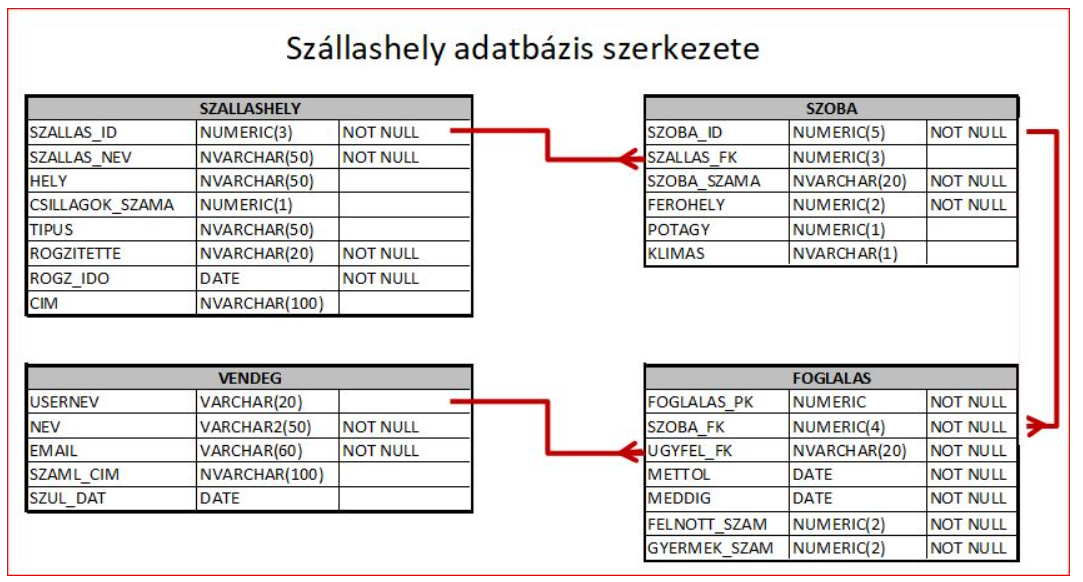

In [11]:
SELECT IIF(v.USERNEV IS NULL, 'Végösszeg', v.USERNEV) AS 'Ügyfél', COUNT(DISTINCT(sza.SZALLAS_NEV)) AS 'Különbözö szálláshelyek'
FROM VENDEG v LEFT JOIN Foglalas f ON v.USERNEV=f.UGYFEL_FK
            LEFT JOIN Szoba sz ON f.SZOBA_FK=sz.SZOBA_ID
            LEFT JOIN Szallashely sza ON sz.SZALLAS_FK = sza.SZALLAS_ID
GROUP BY ROLLUP(v.USERNEV)

Warning: Null value is eliminated by an aggregate or other SET operation.

(197 rows affected)

Total execution time: 00:00:00.025

Ügyfél,Különbözö szálláshelyek
adam1,2
adam3,2
adam4,5
agnes,4
agnes3,3
AGNESH,5
AGNESK,3
akos,7
aladar,3
alexandra,5


Készítsünk listát, amely megjeleníti a vendégek adatait!

- Egy új oszlopban számoljuk ki a vendég életkorát (években)
- Egy másik új oszlopban határozzuk meg, hogy születési dátum szerint növekvő rendezésnél mennyi az adott ügyfél. az előtte lévő 2 ügyfél és az utána lévő 2 ügyfél átlagos életkora! Az oszlopot nevezzük el értelemszerűen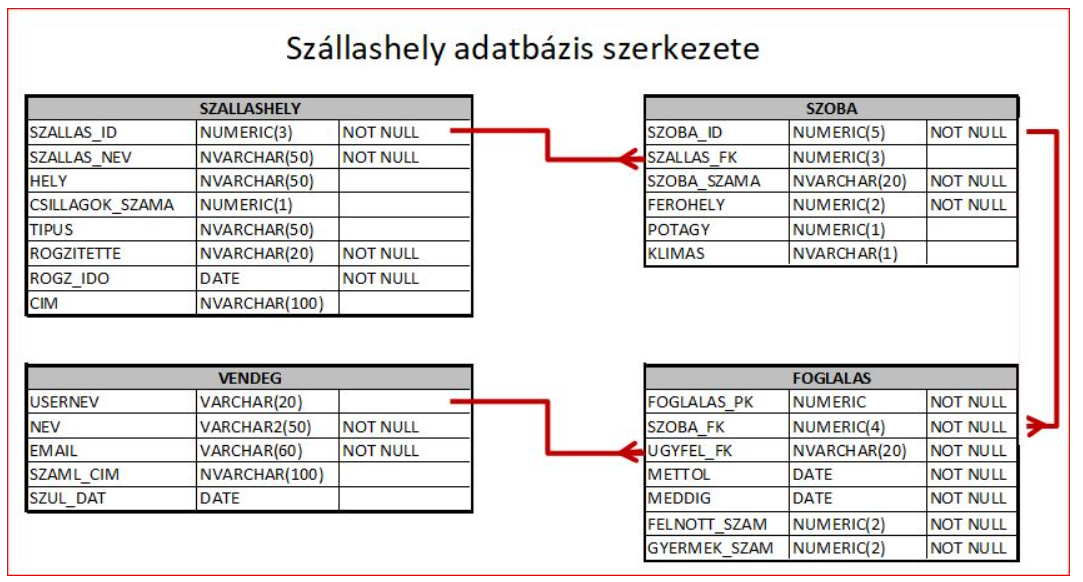

In [21]:
SELECT *, DATEDIFF(YEAR, SZUL_DAT, GETDATE()) AS 'Életkor', 
        AVG(DATEDIFF(YEAR, SZUL_DAT, GETDATE())) 
        OVER(ORDER BY szul_dat ROWS BETWEEN 2 PRECEDING AND 2 FOLLOWING)
FROM Vendeg

(196 rows affected)

Total execution time: 00:00:00.106

USERNEV,NEV,EMAIL,SZAML_CIM,SZUL_DAT,Életkor,(No column name)
anett3,Pivarcsi Anett,anett.pivarcsi@mail.hu,1149 Budapest Fő út 60.,1967-01-03,57,57
gusztav,Bárci Gusztáv,gusztav@gmail.com,3643 Dédestapolcsány Endrődi Sándor utca 47.,1967-02-25,57,57
agnes3,Hartyánszky Ágnes,agnes3@gmail.com,6430 Bácsalmás Posta köz 2.,1967-04-11,57,57
eva,Enyedi Éva,eva@gmail.com,4231 Bököny Petőfi utca 8.,1967-06-30,57,57
ROBERTI,Iván Róbert,róbert.iván@mail.hu,2377 Örkény Petőfi Sándor utca 3.,1967-07-02,57,57
SZILARDS,Szalai Szilárd,szilárd.szalai@mail.hu,1077 Budapest Fő út 18.,1967-09-28,57,57
laszlo1,Farkas László,lászló.farkas@mail.hu,5200 Törökszentmiklós Rendeki utca 21.,1967-10-30,57,56
janos3,Harangozó János,janos3@gmail.com,8700 Marcali Petőfi Sándor tér 1.,1967-11-02,57,56
katalin,Horváth Katalin,katalin.horváth@mail.hu,2424 Előszállás Rákóczi út 200.,1968-01-01,56,56
pal,Barabás Pál,pál.barabás@mail.hu,1183 Budapest Szolnoki út 8.,1968-02-06,56,56
